## Instructions from Guided Capstone<a id='1.1_Imports'></a>

Goal: 
Explore the data relationships of all your features and understand how the features compare to the response variable. <br>
    ● Build data profiles and tables <br>
        ○ Inferential statistics <br>
    ● Explore data relationships <br>
        ○ Data visualization <br>
    ● Feature Selection and Engineering <br>
    
Questions: <br>
    ● Are there variables that are particularly significant in terms of explaining the answer to your project question? <br>
    ● Are there significant differences between subgroups in your data that may be relevant to your project aim? <br>
    ● Are there strong correlations between pairs of independent variables or between an independent and a dependent variable? <br>
    ● What are the most appropriate tests to use to analyze these relationships?

## 1.1 Imports<a id='1.1_Imports'></a>


In [454]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats
import numpy.random
import folium
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## 1.2 Independent Questions (scratch paper) <a id='1.1_Imports'></a> <br>

Do pedestrian crashes occur in different locations to bike crashes in CH, or in NC at large? <br>
Does Chapel Hill have a higher or lower per capita accident rate compared to NC at large? <br>
Are there particularly problematic areas (that are not just population dense/high traffic areas)? <br>
 

## 2.1 Data<a id='1.1_Imports'></a>

In [455]:
ped = pd.read_csv('nulled_ped_crash.csv')
bike = pd.read_csv('nulled_bike_crash.csv')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (17,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [456]:
ped = ped.drop(columns = 'Unnamed: 0')
bike = bike.drop(columns = 'Unnamed: 0')

Just a quick practice and look at the coordinates on a map overlay

(-84.3, -75.33, 33.63, 36.6)

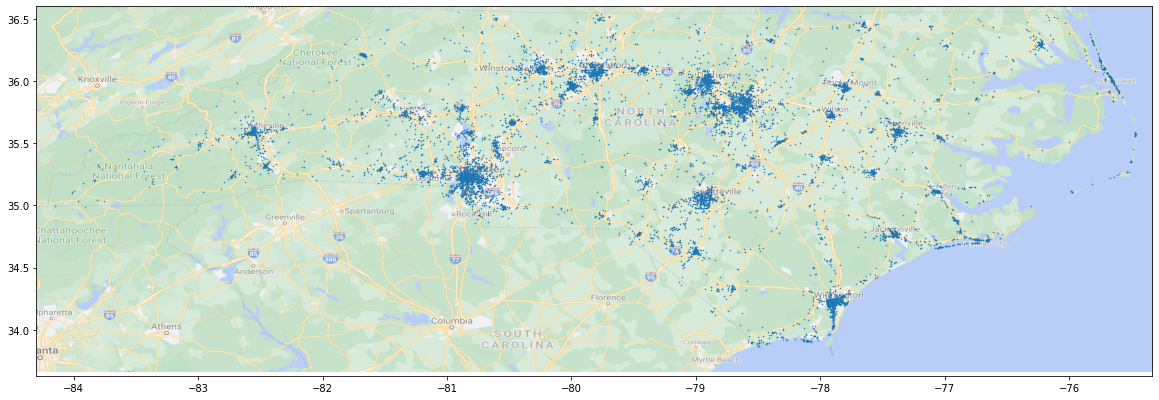

In [457]:
# offset tuning
x, y = (0.005, 0.02)
plt.figure(figsize = [20,10])
image = plt.imread('map.png')
plt.imshow(image, extent = [-84.3+x, -75.33+x, 33.637+y, 36.62+y], alpha = 0.65)
plt.plot(bike.X, bike.Y, linestyle = 'none', marker = '.', markersize = 1)
plt.axis([-84.3,-75.33,33.63,36.6])


In [458]:
ch_bike = bike[bike['City'] == 'Chapel Hill']

(-79.1, -79.0, 35.89, 35.97)

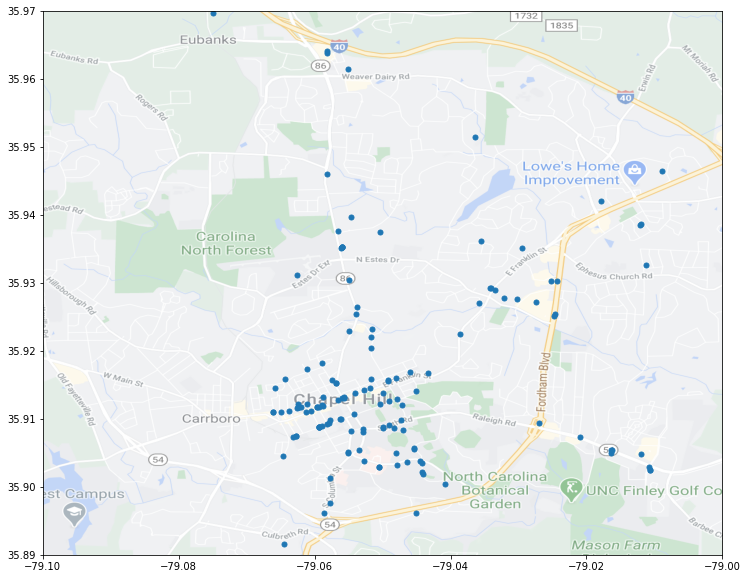

In [459]:
#offsetting
x, y = (+0.008,+0.0002)
plt.figure(figsize = [20,10])
image = plt.imread('ch_map.png')
plt.imshow(image, extent = [-79.15+x, -78.97+x, 35.87+y, 35.97+y], alpha = 0.65)
plt.plot(ch_bike.X, ch_bike.Y, linestyle = 'none', marker = '.', markersize = 10)
plt.axis([-79.10, -79, 35.89, 35.97])

Using Folium

In [460]:
m = folium.Map(location=[(35.87+35.97)/2, (-79.15+-78.97)/2],
              zoom_start = 12.5,
              tiles='Stamen Toner',)
for lat, long in zip(ch_bike.Y, ch_bike.X):
    folium.CircleMarker((lat, long), radius=1, color='red').add_to(m)
m

In [461]:
ch_ped = ped[ped['City'] == 'Chapel Hill']

(-79.1, -79.0, 35.89, 35.97)

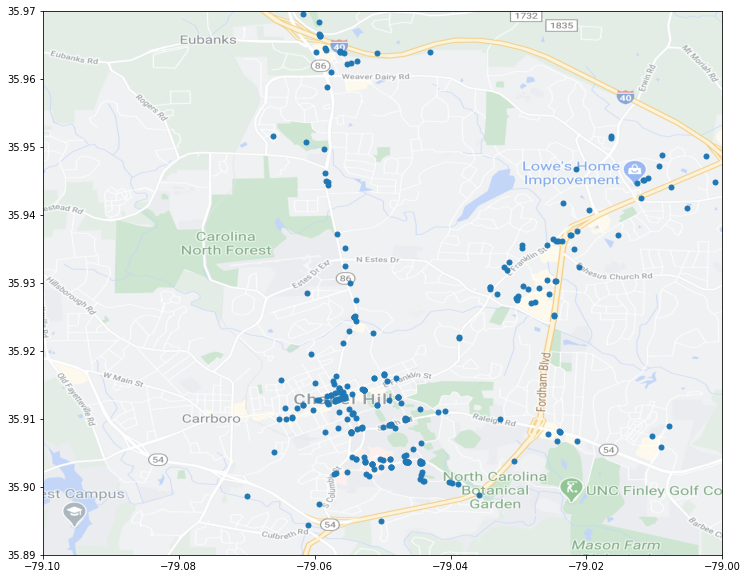

In [462]:
#offsetting
x, y = (+0.008,+0.0002)
plt.figure(figsize = [20,10])
image = plt.imread('ch_map.png')
plt.imshow(image, extent = [-79.15+x, -78.97+x, 35.87+y, 35.97+y], alpha = 0.65)
plt.plot(ch_ped.X, ch_ped.Y, linestyle = 'none', marker = '.', markersize = 10)
plt.axis([-79.10, -79, 35.89, 35.97])

In [463]:
m = folium.Map(location=[(35.87+35.97)/2, (-79.15+-78.97)/2],
              zoom_start = 12.5,
              tiles='Stamen Toner',)
for lat, long in zip(ch_ped.Y, ch_ped.X):
    folium.CircleMarker((lat, long), radius=1, color='blue').add_to(m)
m

In [464]:
print(len(ch_bike), len(ch_ped))

142 272


In [465]:
# both bike and ped
m = folium.Map(location=[(35.87+35.97)/2, (-79.15+-78.97)/2],
              zoom_start = 12.5,
              tiles='Stamen Toner',)
for lat, long in zip(ch_ped.Y, ch_ped.X):
    folium.CircleMarker((lat, long), radius=1, color='blue').add_to(m)
for lat, long in zip(ch_bike.Y, ch_bike.X):
    folium.CircleMarker((lat, long), radius=1, color='red').add_to(m)
m

MENTOR QUESTION <br>
Are there well known methods/functions that grab maps for me and plot lat/long points? I did this manually.

Do bike and ped crashes occur at different places? <br>
<br>
     Just looking at the chapel hill maps, they do occur in similar places, there are just many more pdestrian accidents.
<br>
<br>
Quick and dirty comparison looking at means of coordinates for all the data...

In [466]:
print(ped.X.mean(), ped.Y.mean())
print(bike.X.mean(), bike.Y.mean())

-79.6773898775587 35.51335494238058
-79.27834590542723 35.46520386881016


Let's get population data.

In [467]:
population_url = 'https://www.northcarolina-demographics.com/cities_by_population'
nc_pop = pd.read_html(population_url)
print(nc_pop[0].head())
nc_pop[0].tail()

  Rank           City Population
0    1      Charlotte     885708
1    2        Raleigh     474069
2    3     Greensboro     296710
3    4         Durham     278993
4    5  Winston-Salem     247945


,Rank,City,Population
678,679,Delway,23
679,680,Blue Clay Farms,10
680,681,Fontana Dam,7
681,682,Dellview,6
682,The table above displays the most recent popul...,The table above displays the most recent popul...,The table above displays the most recent popul...


In [468]:
nc_cities = nc_pop[0].iloc[:-1]
nc_cities.tail()

,Rank,City,Population
677,678,Grandfather,24
678,679,Delway,23
679,680,Blue Clay Farms,10
680,681,Fontana Dam,7
681,682,Dellview,6


In [469]:
bike_accidents_by_city = bike.groupby('City').X.count()
nc_cities = nc_cities.join(bike_accidents_by_city, on = 'City')

In [470]:
ped_accidents_by_city = ped.groupby('City').Y.count()
nc_cities = nc_cities.join(ped_accidents_by_city, on = 'City')
nc_cities.columns = ['Rank', 'City', 'Population', 'bike_crashes', 'ped_crashes']
nc_cities

,Rank,City,Population,bike_crashes,ped_crashes
0,1,Charlotte,885708,1284.0,5325.0
1,2,Raleigh,474069,1025.0,2584.0
2,3,Greensboro,296710,473.0,1823.0
3,4,Durham,278993,500.0,1630.0
4,5,Winston-Salem,247945,199.0,850.0
...,...,...,...,...,...
677,678,Grandfather,24,NaN,NaN
678,679,Delway,23,NaN,NaN
679,680,Blue Clay Farms,10,NaN,NaN
680,681,Fontana Dam,7,NaN,NaN


In [471]:
nc_cities['Population'] = nc_cities['Population'].astype('int')

In [472]:
nc_cities['per_cap_bike_10k'] = round(nc_cities['bike_crashes'] / nc_cities['Population'] * 10000, 1)
nc_cities['per_cap_ped_10k'] = round(nc_cities['ped_crashes'] / nc_cities['Population'] * 10000, 1)

In [473]:
nc_cities

,Rank,City,Population,bike_crashes,ped_crashes,per_cap_bike_10k,per_cap_ped_10k
0,1,Charlotte,885708,1284.0,5325.0,14.5,60.1
1,2,Raleigh,474069,1025.0,2584.0,21.6,54.5
2,3,Greensboro,296710,473.0,1823.0,15.9,61.4
3,4,Durham,278993,500.0,1630.0,17.9,58.4
4,5,Winston-Salem,247945,199.0,850.0,8.0,34.3
...,...,...,...,...,...,...,...
677,678,Grandfather,24,NaN,NaN,NaN,NaN
678,679,Delway,23,NaN,NaN,NaN,NaN
679,680,Blue Clay Farms,10,NaN,NaN,NaN,NaN
680,681,Fontana Dam,7,NaN,NaN,NaN,NaN


In [474]:
nc_cities[nc_cities['City'] == 'Chapel Hill']

,Rank,City,Population,bike_crashes,ped_crashes,per_cap_bike_10k,per_cap_ped_10k
14,15,Chapel Hill,64051,142.0,272.0,22.2,42.5


In [475]:
print(f"NC Average Bike Crash Per 10k: {round(nc_cities['per_cap_bike_10k'].mean(),1)}")
print(f"NC Average Ped Crash Per 10k: {round(nc_cities['per_cap_ped_10k'].mean(),1)}")

NC Average Bike Crash Per 10k: 20.5
NC Average Ped Crash Per 10k: 36.9


It appears that Chapel Hill's per capita bike and pedestrian crashes differ from that of NC at large, but less so for the bike accident rate.

Going to try to get an idea of how Chapel Hill compares to the state or other cities over time.

In [476]:
nc_cities[nc_cities['City'] == 'Chapel Hill'].iloc[0]['Population']

64051

Text(0.5, 1.0, 'bike')

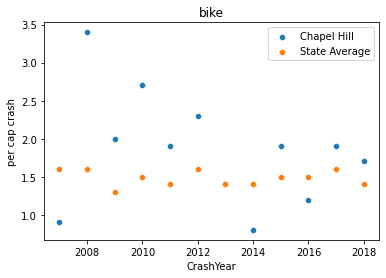

In [477]:
cap_factor = 10000 / nc_cities[nc_cities['City'] == 'Chapel Hill'].iloc[0]['Population']
state_pop = nc_cities['Population'].sum()

ch = round(bike[bike['City'] == "Chapel Hill"][['City','CrashYear']].groupby('CrashYear').count() * cap_factor,1)
ch.reset_index(inplace = True)
state = round(bike[['City', 'CrashYear']].groupby('CrashYear').count() * 10000/state_pop,1)
state.reset_index(inplace = True)

sns.scatterplot(x = ch.CrashYear, y = ch.City)
sns.scatterplot(x = state.CrashYear, y = state.City)
plt.ylabel('per cap crash')
plt.legend(['Chapel Hill', 'State Average'])
plt.title('bike')

Text(0.5, 1.0, 'ped')

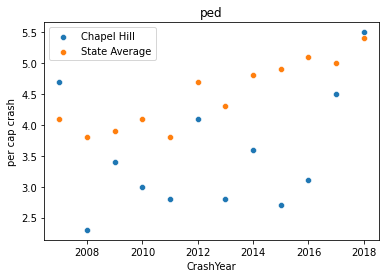

In [478]:
ch = round(ped[ped['City'] == "Chapel Hill"][['City','CrashYear']].groupby('CrashYear').count() * cap_factor,1)
ch.reset_index(inplace = True)
state = round(ped[['City', 'CrashYear']].groupby('CrashYear').count() * 10000/state_pop,1)
state.reset_index(inplace = True)

sns.scatterplot(x = ch.CrashYear, y = ch.City)
sns.scatterplot(x = state.CrashYear, y = state.City)
plt.ylabel('per cap crash')
plt.legend(['Chapel Hill', 'State Average'])
plt.title('ped')

There is too much variability in the year to year crashes in chapel hill to see a clear trend in the bike crashes. The ped crashes also seem highly variable. It may be more helpful to compare to different population groupings.

In [479]:
nc_cities.Population.describe()

count       682.000000
mean       9210.938416
std       45017.540525
min           6.000000
25%         573.250000
50%        1618.500000
75%        4479.750000
max      885708.000000
Name: Population, dtype: float64

<AxesSubplot:xlabel='Population', ylabel='Count'>

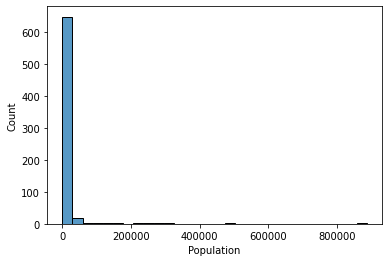

In [480]:
sns.histplot(nc_cities.Population, bins = 30)

This clearly shows that there are A LOT of small towns. Since these small towns are also very unlikely to have very many accidents, any accident is going to make any per capita measurement very impractical. It seems prudent to exclude populations below a certain threshhold.

In [481]:
big_city_limit = 50000
small_city_limit = 10000

In [482]:
nc_cities.loc[nc_cities.Population > big_city_limit, 'size'] = 'big city'
nc_cities.loc[nc_cities.Population < big_city_limit, 'size'] = 'small city'
nc_cities.loc[nc_cities.Population <= small_city_limit, 'size'] = 'town'

In [483]:
small = nc_cities[nc_cities['size'] == 'small city']
big = nc_cities[nc_cities['size'] == 'big city']
small_big = pd.concat([small,big])

<AxesSubplot:xlabel='size', ylabel='per_cap_bike_10k'>

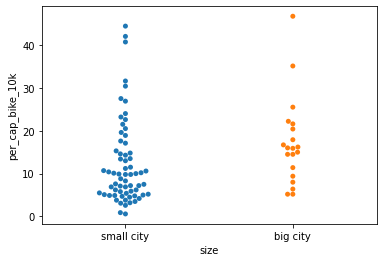

In [484]:
sns.swarmplot(x = 'size', 
              y = 'per_cap_bike_10k',
              order = ['small city', 'big city'],
              data = small_big)

<AxesSubplot:xlabel='size', ylabel='per_cap_ped_10k'>

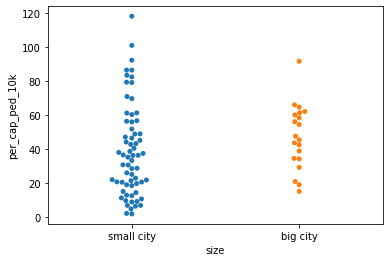

In [485]:
sns.swarmplot(x = 'size', 
              y = 'per_cap_ped_10k',
              order = ['small city', 'big city'],
              data = small_big)

In [486]:
print("bike")
print(round(small.per_cap_bike_10k.mean(),2), big.per_cap_bike_10k.mean())
print("ped")
print(round(small.per_cap_ped_10k.mean(),2), round(big.per_cap_ped_10k.mean(),2))

bike
12.26 17.19
ped
38.88 47.33


At a glance, it looks like denser areas have higher per capita accident rates (using raw population as a proxy for density).

Comment: Not sure if bootstrapping is necessarily the correct approach here, but will use a variety of methods to look at difference in means.


<AxesSubplot:xlabel='per_cap_bike_10k', ylabel='Proportion'>

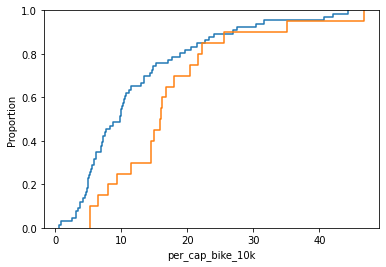

In [487]:
sns.ecdfplot(small['per_cap_bike_10k'])
sns.ecdfplot(big['per_cap_bike_10k'])

<AxesSubplot:xlabel='per_cap_ped_10k', ylabel='Proportion'>

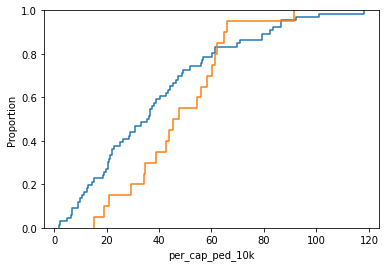

In [488]:
sns.ecdfplot(small['per_cap_ped_10k'])
sns.ecdfplot(big['per_cap_ped_10k'])

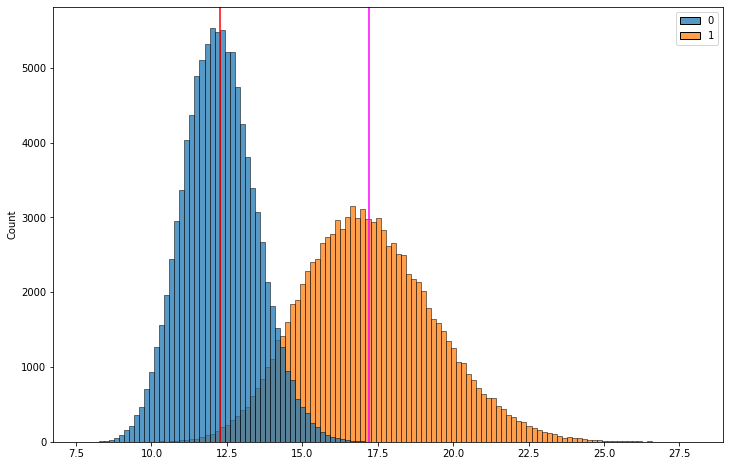

In [489]:
iterations = 100000
sample_factor = 1
small_bikecap = small['per_cap_bike_10k'][~numpy.isnan(small['per_cap_bike_10k'])]
big_bikecap = big['per_cap_bike_10k'][~numpy.isnan(big['per_cap_bike_10k'])]
small_means = []
big_means = []

for i in range(iterations):
    small_sample = np.random.choice(small_bikecap, int(len(small_bikecap)/sample_factor))
    small_means.append(small_sample.mean())
    
    big_sample = np.random.choice(big_bikecap, int(len(big_bikecap)/sample_factor))
    big_means.append(big_sample.mean())

plt.figure(figsize=(12,8))
sns.histplot([small_means, big_means])
plt.axvline(np.mean(small_means), color = "red")
plt.axvline(np.mean(big_means), color = "magenta")
plt.show()

In [490]:
small_bigger = np.sum(small_means > np.mean(big_means))/len(big_means)
big_smaller = np.sum(big_means < np.mean(small_means))/len(big_means)
print(small_bigger, big_smaller)

9e-05 0.00551


Ttest_indResult(statistic=-1.9520828462350892, pvalue=0.054259835570200275)


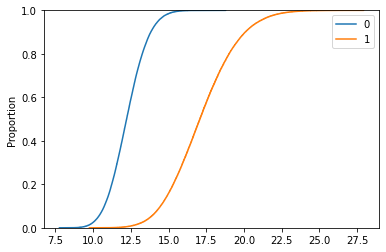

In [491]:
sns.ecdfplot([small_means,big_means])
print(scipy.stats.ttest_ind(small_bikecap,big_bikecap))

Using the t-test and having a null hypothesis that the mean number of bike accidents per 10,000 people in big vs small cities as not being different, we find that the probability of getting this difference in means purely by chance is 5.4%.

The bootstrap method seems to give an almost 0% chance that the small city mean would be bigger than the big city mean purely by chance. However, there appears to be about a 0.5% chance that the bigger cities would have a mean smaller than the small city mean purely by chance?

(Something seems wrong here)

There may not be a problem since these two values are not picked pair-wise and are independent.

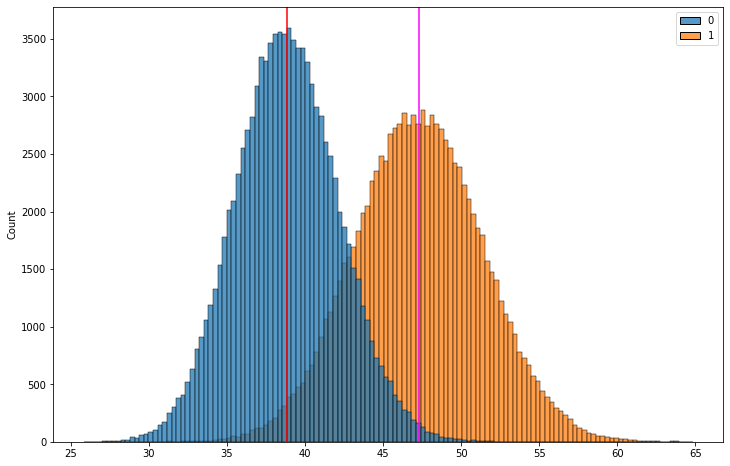

In [492]:
iterations = 100000
sample_factor = 1
small_pedcap = small['per_cap_ped_10k'][~numpy.isnan(small['per_cap_ped_10k'])]
big_pedcap = big['per_cap_ped_10k'][~numpy.isnan(big['per_cap_ped_10k'])]
small_means = []
big_means = []

for i in range(iterations):
    small_sample = np.random.choice(small_pedcap, int(len(small_pedcap)/sample_factor))
    small_means.append(small_sample.mean())
    
    big_sample = np.random.choice(big_pedcap, int(len(big_pedcap)/sample_factor))
    big_means.append(big_sample.mean())

plt.figure(figsize=(12,8))
sns.histplot([small_means, big_means])
plt.axvline(np.mean(small_means), color = "red")
plt.axvline(np.mean(big_means), color = "magenta")
plt.show()

In [493]:
small_bigger = np.sum(small_means > np.mean(big_means))/len(big_means)
big_smaller = np.sum(big_means < np.mean(small_means))/len(big_means)
print(small_bigger, big_smaller)

0.00622 0.01858


Ttest_indResult(statistic=-1.3073604091663058, pvalue=0.19465757109703843)


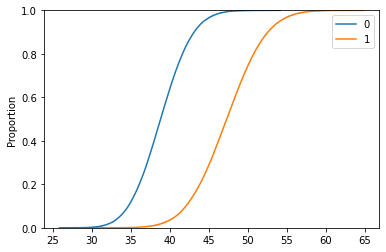

In [494]:
sns.ecdfplot([small_means,big_means])
print(scipy.stats.ttest_ind(small_pedcap, big_pedcap))

Examining some of the features

In [495]:
bike.columns

Index(['X', 'Y', 'OBJECTID', 'AmbulanceR', 'BikeAge', 'BikeAgeGrp',
       'BikeAlcDrg', 'BikeAlcFlg', 'BikeDir', 'BikeInjury', 'BikePos',
       'BikeRace', 'BikeSex', 'City', 'County', 'CrashAlcoh', 'CrashDay',
       'CrashGrp', 'CrashHour', 'CrashLoc', 'CrashMonth', 'CrashSevr',
       'CrashType', 'CrashYear', 'Developmen', 'DrvrAge', 'DrvrAgeGrp',
       'DrvrAlcDrg', 'DrvrAlcFlg', 'DrvrInjury', 'DrvrRace', 'DrvrSex',
       'DrvrVehTyp', 'HitRun', 'Latitude', 'LightCond', 'Locality',
       'Longitude', 'NumLanes', 'NumUnits', 'RdCharacte', 'RdClass',
       'RdConditio', 'RdConfig', 'RdDefects', 'RdFeature', 'RdSurface',
       'Region', 'RuralUrban', 'SpeedLimit', 'TraffCntrl', 'Weather',
       'Workzone'],
      dtype='object')

In [507]:
bike.loc[bike.BikeAge == '70+', 'BikeAge'] = np.nan
bike.BikeAge = pd.to_numeric(bike.BikeAge)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


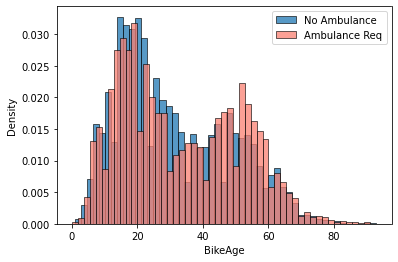

In [542]:
sns.histplot(bike[bike.AmbulanceR == 'No']['BikeAge'], label = 'No Ambulance', stat='density', bins = 50)
sns.histplot(bike[bike.AmbulanceR == 'Yes']['BikeAge'], label = 'Ambulance Req', stat='density', color='salmon', bins = 50)
plt.legend()

It looks like ambulances may be required slightly more often with older cyclists in accidents.

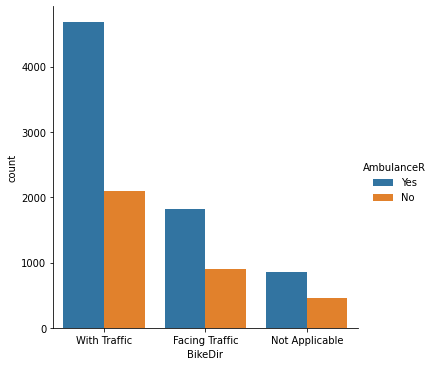

In [512]:
sns.catplot(x='BikeDir', data=bike, hue='AmbulanceR',kind='count')

In [515]:
bike.BikeInjury.value_counts()

B: Suspected Minor Injury      4660
C: Possible Injury             4338
O: No Injury                   1102
A: Suspected Serious Injury     577
K: Killed                       250
Name: BikeInjury, dtype: int64

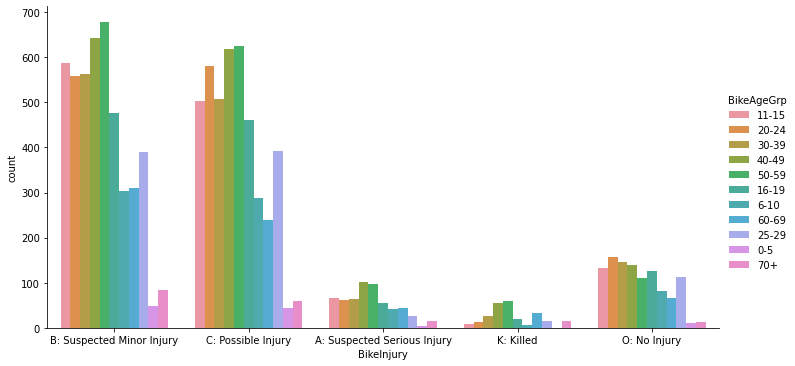

In [526]:
sns.catplot(x = 'BikeInjury', hue = 'BikeAgeGrp', data=bike, kind = 'count', aspect=2)

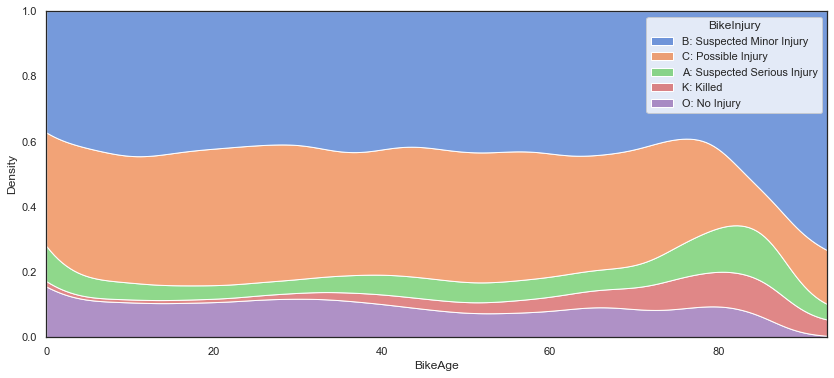

In [632]:

plt.figure(figsize=(14,6))
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
sns.kdeplot(x="BikeAge", hue="BikeInjury", fill=True, data=bike, multiple='fill', cut=0)
plt.show()

Minor injuries drastically increase at the upper end of age. The incidence of death also gradually increases with age.